In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
json_path = Path('models_mementoml_top50_with_metadata.json')

with open(json_path, 'r') as f:
    models_data = json.load(f)

print(f"Loaded {len(models_data)} model configurations")
print(f"\nFirst model example:")
print(json.dumps(models_data[0], indent=2))


Loaded 50 model configurations

First model example:
{
  "name": "xgboost_top1_param1070",
  "class": "xgboost.XGBClassifier",
  "params": {
    "n_estimators": 355,
    "learning_rate": 0.0324106605480031,
    "max_depth": 8,
    "subsample": 0.867935555521399,
    "colsample_bytree": 0.71023326292634,
    "colsample_bylevel": 0.690302629210055,
    "min_child_weight": 2.18921599683768,
    "booster": "gbtree",
    "random_state": 42,
    "tree_method": "hist"
  },
  "metadata": {
    "auc_mean": 0.9992955869323978,
    "auc_std": 0.00028550785350517686,
    "auc_min": 0.998810179904216,
    "auc_max": 0.999864147215018,
    "cv": 0.0002857091107363125,
    "composite_score": 0.9997754927158461,
    "n_evaluations": 20,
    "param_index": 1070,
    "rank": 1
  }
}


In [3]:
data_list = []

for model in models_data:
    metadata = model.get('metadata', {})
    model_class = model['class'].split('.')[-1]
    
    data_list.append({
        'name': model['name'],
        'model_type': model_class,
        'auc_mean': metadata.get('auc_mean', 0),
        'auc_std': metadata.get('auc_std', 0),
        'cv': metadata.get('cv', 0),
        'composite_score': metadata.get('composite_score', 0),
        'n_evaluations': metadata.get('n_evaluations', 0),
        'rank': metadata.get('rank', 0),
        'auc_min': metadata.get('auc_min', 0),
        'auc_max': metadata.get('auc_max', 0)
    })

df = pd.DataFrame(data_list)

print("Dataset Overview:")
print(f"Total models: {len(df)}")
print(f"\nModels by type:")
print(df['model_type'].value_counts())
print(f"\nPerformance Statistics:")
print(df[['auc_mean', 'auc_std', 'cv', 'composite_score']].describe())
print(f"\nFirst few rows:")
df.head(10)


Dataset Overview:
Total models: 50

Models by type:
model_type
XGBClassifier                 15
RandomForestClassifier        10
GradientBoostingClassifier    10
LogisticRegression            10
KNeighborsClassifier           5
Name: count, dtype: int64

Performance Statistics:
        auc_mean    auc_std         cv  composite_score
count  50.000000  50.000000  50.000000        50.000000
mean    0.924999   0.079394   0.089244         0.825711
std     0.053034   0.053712   0.061151         0.122211
min     0.858765   0.000270   0.000270         0.681654
25%     0.882897   0.000309   0.000309         0.730705
50%     0.912766   0.100473   0.110184         0.791400
75%     0.999210   0.119261   0.135080         0.999650
max     0.999296   0.135379   0.157311         0.999775

First few rows:


,name,model_type,auc_mean,auc_std,cv,composite_score,n_evaluations,rank,auc_min,auc_max
0,xgboost_top1_param1070,XGBClassifier,0.999296,0.000286,0.000286,0.999775,20,1,0.998810,0.999864
1,xgboost_top2_param1049,XGBClassifier,0.999255,0.000272,0.000272,0.999729,20,2,0.998864,0.999848
2,xgboost_top3_param1056,XGBClassifier,0.999255,0.000287,0.000288,0.999717,20,3,0.998812,0.999858
3,xgboost_top4_param1045,XGBClassifier,0.999243,0.000296,0.000296,0.999694,20,4,0.998686,0.999839
4,xgboost_top5_param1079,XGBClassifier,0.999240,0.000292,0.000292,0.999693,20,5,0.998838,0.999891
5,xgboost_top6_param1160,XGBClassifier,0.999249,0.000309,0.000309,0.999691,20,6,0.998747,0.999893
6,xgboost_top7_param1109,XGBClassifier,0.999240,0.000313,0.000314,0.999676,20,7,0.998688,0.999844
7,xgboost_top8_param1113,XGBClassifier,0.999233,0.000309,0.000309,0.999669,20,8,0.998733,0.999860
8,xgboost_top9_param1095,XGBClassifier,0.999211,0.000270,0.000270,0.999669,20,9,0.998806,0.999856
9,xgboost_top10_param1073,XGBClassifier,0.999215,0.000280,0.000280,0.999666,20,10,0.998680,0.999767


C:\Users\weron\AppData\Local\Temp\ipykernel_38876\395309038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='model_type', y='auc_mean', palette='Set2')


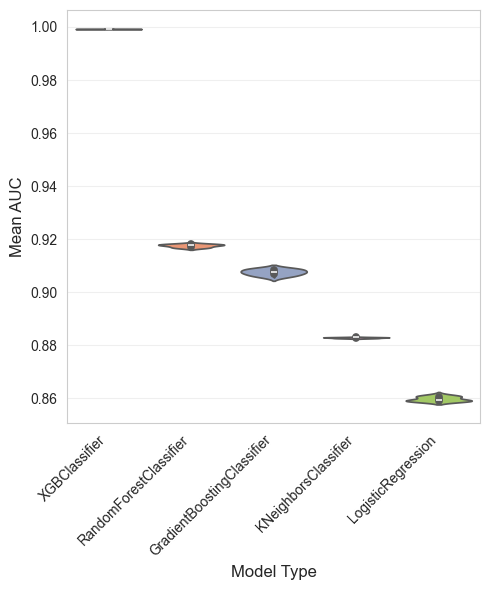


AUC Statistics by Model Type:
                                mean       std       min       max  count
model_type                                                               
GradientBoostingClassifier  0.907495  0.001109  0.905675  0.908874     10
KNeighborsClassifier        0.882808  0.000161  0.882596  0.882962      5
LogisticRegression          0.859723  0.000908  0.858765  0.861172     10
RandomForestClassifier      0.917524  0.000559  0.916658  0.918112     10
XGBClassifier               0.999234  0.000024  0.999204  0.999296     15


In [ ]:
plt.figure(figsize=(5, 5))

sns.violinplot(data=df, x='model_type', y='auc_mean', palette='Set2')
plt.xticks(rotation=45, ha='right')
# plt.title('AUC Distribution (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Mean AUC', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAUC Statistics by Model Type:")
print(df.groupby('model_type')['auc_mean'].agg(['mean', 'std', 'min', 'max', 'count']))


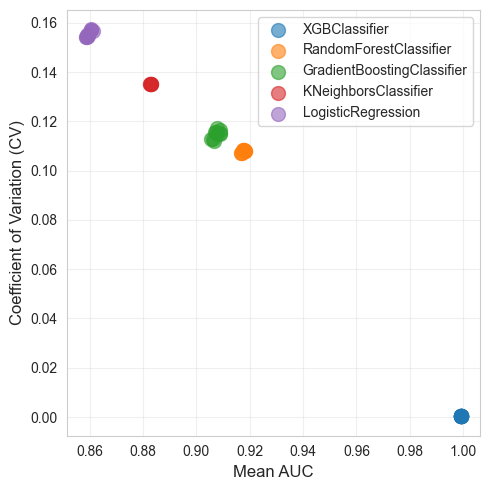

In [12]:
plt.figure(figsize=(5, 5))

for model_type in df['model_type'].unique():
    subset = df[df['model_type'] == model_type]
    plt.scatter(subset['auc_mean'], subset['cv'], 
                label=model_type, alpha=0.6, s=100)

plt.xlabel('Mean AUC', fontsize=12)
plt.ylabel('Coefficient of Variation (CV)', fontsize=12)
# plt.title('AUC Mean vs CV\n(Lower-right is better: high mean, low CV)', 
#           fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Model Portfolio Distribution Table (Tabela 1)


In [6]:
# Group by model type
model_stats = df.groupby('model_type').agg({
    'name': 'count',
    'auc_mean': 'mean',
    'cv': 'mean',
    'composite_score': 'mean'
}).round(4)

model_stats.columns = ['Liczba', 'AUC_mean', 'CV_mean', 'Score_comp']
model_stats = model_stats.sort_values('Liczba', ascending=False)

# Check if we have RandomForestClassifier from different sources
rf_from_ranger = len([m for m in models_data if 'RandomForestClassifier' in m['class'] and 'ranger' in m['name']])
rf_from_randomForest = len([m for m in models_data if 'RandomForestClassifier' in m['class'] and 'randomForest' in m['name']])

# Create detailed table
table_data = []
for model_type in model_stats.index:
    row_data = {
        'Typ modelu': model_type,
        'Liczba': int(model_stats.loc[model_type, 'Liczba']),
        'AUC_mean': model_stats.loc[model_type, 'AUC_mean'],
        'CV_mean': model_stats.loc[model_type, 'CV_mean'],
        'Score_comp': model_stats.loc[model_type, 'Score_comp']
    }
    table_data.append(row_data)
    
    # Add breakdown for RandomForestClassifier if from multiple sources
    if model_type == 'RandomForestClassifier' and (rf_from_ranger > 0 or rf_from_randomForest > 0):
        if rf_from_ranger > 0:
            ranger_df = df[[('ranger' in models_data[i]['name']) for i in range(len(models_data))] and 
                          [models_data[i]['class'].split('.')[-1] == 'RandomForestClassifier' for i in range(len(models_data))]]
            # Get stats for ranger-based RF configs
            ranger_configs = [i for i, m in enumerate(models_data) if 'ranger' in m['name'] and 'RandomForestClassifier' in m['class']]
            if ranger_configs:
                ranger_auc = np.mean([models_data[i]['metadata']['auc_mean'] for i in ranger_configs])
                ranger_cv = np.mean([models_data[i]['metadata'].get('cv', 0) for i in ranger_configs])
                ranger_score = np.mean([models_data[i]['metadata'].get('composite_score', 0) for i in ranger_configs])
                table_data.append({
                    'Typ modelu': '  (z ranger)',
                    'Liczba': rf_from_ranger,
                    'AUC_mean': ranger_auc,
                    'CV_mean': ranger_cv,
                    'Score_comp': ranger_score
                })
        
        if rf_from_randomForest > 0:
            # Get stats for randomForest-based RF configs
            rf_configs = [i for i, m in enumerate(models_data) if 'randomForest' in m['name'] and 'RandomForestClassifier' in m['class']]
            if rf_configs:
                rf_auc = np.mean([models_data[i]['metadata']['auc_mean'] for i in rf_configs])
                rf_cv = np.mean([models_data[i]['metadata'].get('cv', 0) for i in rf_configs])
                rf_score = np.mean([models_data[i]['metadata'].get('composite_score', 0) for i in rf_configs])
                table_data.append({
                    'Typ modelu': '  (z randomForest)',
                    'Liczba': rf_from_randomForest,
                    'AUC_mean': rf_auc,
                    'CV_mean': rf_cv,
                    'Score_comp': rf_score
                })

table_df = pd.DataFrame(table_data)
print("\n")
print(table_df.to_string(index=False))
print("\n")




                Typ modelu  Liczba  AUC_mean  CV_mean  Score_comp
             XGBClassifier      15  0.999200 0.000300     0.99970
GradientBoostingClassifier      10  0.907500 0.114700     0.78110
        LogisticRegression      10  0.859700 0.155600     0.68210
    RandomForestClassifier      10  0.917500 0.107900     0.80060
          (z randomForest)      10  0.917524 0.107903     0.80057
      KNeighborsClassifier       5  0.882800 0.135100     0.73050


